In [1]:
from util_0 import *
#from util_new_0 import *
from argparse import ArgumentParser
from torch.utils.data import DataLoader
from model_0 import Net
from tqdm import tqdm
import numpy as np

/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [9]:
parser = ArgumentParser()
parser.add_argument("--name", type=str, default="default")
parser.add_argument("--model", type=str, default="poisson", help="erpp, rmtpp")
parser.add_argument("--seq_len", type=int, default=6)
parser.add_argument("--emb_dim", type=int, default=10)
parser.add_argument("--hid_dim", type=int, default=32)
parser.add_argument("--mlp_dim", type=int, default=16)
parser.add_argument("--dropout", type=float, default=0.1)
parser.add_argument("--alpha", type=float, default=0.05)
parser.add_argument("--batch_size", type=int, default=4)
#parser.add_argument("--event_class", type=int, default=7)
parser.add_argument("--event_class", type=int, default=1)
parser.add_argument("--verbose_step", type=int, default=3)
parser.add_argument("--importance_weight", action="store_true")
parser.add_argument("--lr", type=int, default=1e-3)
parser.add_argument("--epochs", type=int, default=1000)
config = parser.parse_args("")

In [18]:
train_set = ATMDataset(config, subset='train')

100%|██████████| 370106/370106 [00:01<00:00, 235671.32it/s]

TOTAL SEQs: 364705
< {0.001} = {0.7278214584853152}
< {0.01} = {0.8774121207208667}
< {0.1} = {0.9104131204236579}
< {1} = {0.9390532544378698}
< {10} = {0.9831806760152387}
< {100} = {0.9999567696090351}


In [8]:
train_set.time_seqs[0]

0.001

In [14]:
pbar = tqdm(total=len(train_set.id) - train_set.seq_len + 1)

  0%|          | 0/370102 [00:00<?, ?it/s]

In [5]:
229 *0.8
229-183

46

In [10]:
# train_set = ATMDataset(config, subset='train')
# test_set = ATMDataset(config, subset='test')
# train_loader = DataLoader(train_set, batch_size=config.batch_size, shuffle=True, collate_fn=ATMDataset.to_features)
# test_loader = DataLoader(test_set, batch_size=config.batch_size, shuffle=False, collate_fn=ATMDataset.to_features)
                         
# train_set = EicuDataset(config, subset='train')
# test_set = EicuDataset(config, subset='test')
# train_loader = DataLoader(train_set, batch_size=config.batch_size, shuffle=True, collate_fn=EicuDataset.to_features_1)
# test_loader = DataLoader(test_set, batch_size=config.batch_size, shuffle=False, collate_fn=EicuDataset.to_features_1)


eventTrainIn,timeTrainIn,eventTestIn,timeTestIn=read_data(config.seq_len)
print("timeTrainIn size",np.shape(timeTrainIn))
print("timeTestIn size",np.shape(timeTestIn))
print("Max train seq_len",np.max([np.max(np.nonzero(t)) for t in timeTrainIn]))
train_set = EicuDataset_new(eventTrainIn,timeTrainIn,config.seq_len)
test_set = EicuDataset_new(eventTestIn,timeTestIn,config.seq_len)
train_loader = DataLoader(train_set, batch_size=config.batch_size, shuffle=True, collate_fn=EicuDataset_new.to_features_1)
test_loader = DataLoader(test_set, batch_size=config.batch_size, shuffle=False, collate_fn=EicuDataset_new.to_features_1)

    
weight = np.ones(config.event_class)


def evaluate_1():
    model.eval()
    pred_times, pred_events = [], []
    gold_times, gold_events = [], []
    for i, batch in enumerate(tqdm(test_loader)):
        _, gold_time,_, gold_event,_=batch
        gold_times.append(gold_time.numpy())
        gold_events.append(gold_event.numpy())
        #pred_time, pred_event = model.predict_2(batch) #rmtpp
        pred_time, pred_event = model.predict_3(batch) #poisson
        pred_times.append(pred_time)
        pred_events.append(pred_event)
    pred_times = np.concatenate(pred_times).reshape(-1)
    gold_times = np.concatenate(gold_times).reshape(-1)
    pred_events = np.concatenate(pred_events).reshape(-1)
    gold_events = np.concatenate(gold_events).reshape(-1)
    print("gold_times",gold_times)
    print("pred_times",pred_times)
    time_error = abs_error(pred_times, gold_times)
    #acc, recall, f1 = clf_metric(pred_events, gold_events, n_class=config.event_class)
    print("epoch" ,{epc})
    print("time_error:", {time_error} )
    return time_error


fileno 229
timeTrainIn size (19, 6)
timeTestIn size (11, 6)
Max train seq_len 5


In [11]:
model = Net(config, lossweight=weight)
model.set_optimizer(total_step=len(train_loader) * config.epochs, use_bert=True)

------time_criterion poisson


In [12]:
total_loss=[]
time_error=[]
for epc in range(config.epochs):
        model.train()
        range_loss1 = range_loss2 = range_loss = 0
        for i, batch in enumerate(tqdm(train_loader)):
            l1, l2, l = model.train_batch_2(batch)
            #l1, l2, l = model.train_batch(batch)
            range_loss1 += l1
            range_loss2 += l2
            range_loss += l

            if (i + 1) % config.verbose_step == 0:
                print("time loss: ", range_loss1 / config.verbose_step)
                #print("event loss:", range_loss2 / config.verbose_step)
                print("total loss:", range_loss / config.verbose_step)
                total_loss.append(range_loss / config.verbose_step)
                range_loss1 = range_loss2 = range_loss = 0

                
                time_error.append(evaluate_1())

100%|██████████| 5/5 [00:00<00:00, 100.39it/s]

time loss:  0.7882859706878662
total loss: 0.7882859706878662
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.10513977 2.10513977 2.10513977 2.10513977 2.10513977 2.10513977
 2.10513977 2.10513977 2.10513977 2.10513977 2.10513977]
epoch {0}
time_error: {2.019914120504952}
time loss:  0.7930159966150919
total loss: 0.7930159966150919
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.10480406 2.10480406 2.10480406 2.10480406 2.10480406 2.10480406
 2.10480406 2.10480406 2.10480406 2.10480406 2.10480406]
epoch {1}
time_error: {2.019578406634449}
time loss:  0.7767392794291178
total loss: 0.7767392794291178
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.10408103 2.10408103 2.10408103 2.10408103


100%|██████████| 5/5 [00:00<00:00, 99.04it/s]

time loss:  0.7914345264434814
total loss: 0.7914345264434814
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.1016558 2.1016558 2.1016558 2.1016558 2.1016558 2.1016558 2.1016558
 2.1016558 2.1016558 2.1016558 2.1016558]
epoch {4}
time_error: {2.016430144540225}
time loss:  0.8014105955759684
total loss: 0.8014105955759684
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.10005299 2.10005299 2.10005299 2.10005299 2.10005299 2.10005299
 2.10005299 2.10005299 2.10005299 2.10005299 2.10005299]
epoch {5}
time_error: {2.0148273314832963}
time loss:  0.7869381904602051
total loss: 0.7869381904602051
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.09823962 2.09823962 2.09823962 2.09823962 2.0982396


100%|██████████| 3/3 [00:00<00:00, 92.23it/s]


time loss:  0.7671029567718506
total loss: 0.7671029567718506
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.09408799 2.09408799 2.09408799 2.09408799 2.09408799 2.09408799
 2.09408799 2.09408799 2.09408799 2.09408799 2.09408799]
epoch {8}
time_error: {2.0088623374755876}
time loss:  0.7873501777648926
total loss: 0.7873501777648926
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.09179615 2.09179615 2.09179615 2.09179615 2.09179615 2.09179615
 2.09179615 2.09179615 2.09179615 2.09179615 2.09179615]
epoch {9}
time_error: {2.0065704988369077}
time loss:  0.7869503696759542
total loss: 0.7869503696759542
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.08937121 2.08937121 2.08937121 2.089371

100%|██████████| 3/3 [00:00<00:00, 86.72it/s]

time loss:  0.7699306011199951
total loss: 0.7699306011199951
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.0841576 2.0841576 2.0841576 2.0841576 2.0841576 2.0841576 2.0841576
 2.0841576 2.0841576 2.0841576 2.0841576]
epoch {12}
time_error: {1.9989319508626424}
time loss:  0.7842841545740763
total loss: 0.7842841545740763
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.0813855 2.0813855 2.0813855 2.0813855 2.0813855 2.0813855 2.0813855
 2.0813855 2.0813855 2.0813855 2.0813855]
epoch {13}
time_error: {1.9961598487719612}
time loss:  0.784005880355835
total loss: 0.784005880355835
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.07851621 2.07851621 2.07851621 2.07851621 2.07851621 2.078516


100%|██████████| 3/3 [00:00<00:00, 93.62it/s]

time loss:  0.7720871369043986
total loss: 0.7720871369043986
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.07248423 2.07248423 2.07248423 2.07248423 2.07248423 2.07248423
 2.07248423 2.07248423 2.07248423 2.07248423 2.07248423]
epoch {16}
time_error: {1.987258577385147}
time loss:  0.7756526072820028
total loss: 0.7756526072820028
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.06933817 2.06933817 2.06933817 2.06933817 2.06933817 2.06933817
 2.06933817 2.06933817 2.06933817 2.06933817 2.06933817]
epoch {17}
time_error: {1.9841125183435686}
time loss:  0.7948262890179952
total loss: 0.7948262890179952
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.06611554 2.06611554 2.06611554 2.06611


  0%|          | 0/5 [00:00<?, ?it/s]

time loss:  0.767007072766622
total loss: 0.767007072766622
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.05940335 2.05940335 2.05940335 2.05940335 2.05940335 2.05940335
 2.05940335 2.05940335 2.05940335 2.05940335 2.05940335]
epoch {20}
time_error: {1.9741777004959964}
time loss:  0.7686205506324768
total loss: 0.7686205506324768
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.05594138 2.05594138 2.05594138 2.05594138 2.05594138 2.05594138
 2.05594138 2.05594138 2.05594138 2.05594138 2.05594138]
epoch {21}
time_error: {1.9707157229621564}
time loss:  0.7719332774480184
total loss: 0.7719332774480184
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.05240828 2.05240828 2.05240828 2.052408


100%|██████████| 3/3 [00:00<00:00, 92.90it/s]

time loss:  0.7658243378003439
total loss: 0.7658243378003439
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.04514086 2.04514086 2.04514086 2.04514086 2.04514086 2.04514086
 2.04514086 2.04514086 2.04514086 2.04514086 2.04514086]
epoch {24}
time_error: {1.9599152082930458}
time loss:  0.7542937397956848
total loss: 0.7542937397956848
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.04140953 2.04140953 2.04140953 2.04140953 2.04140953 2.04140953
 2.04140953 2.04140953 2.04140953 2.04140953 2.04140953]
epoch {25}
time_error: {1.956183878322315}
time loss:  0.7541374365488688
total loss: 0.7541374365488688
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.0376156 2.0376156 2.0376156 2.0376156 


100%|██████████| 3/3 [00:00<00:00, 96.37it/s]

time loss:  0.750390628973643
total loss: 0.750390628973643
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.02985689 2.02985689 2.02985689 2.02985689 2.02985689 2.02985689
 2.02985689 2.02985689 2.02985689 2.02985689 2.02985689]
epoch {28}
time_error: {1.9446312390803902}
time loss:  0.7663184007008871
total loss: 0.7663184007008871
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.02589548 2.02589548 2.02589548 2.02589548 2.02589548 2.02589548
 2.02589548 2.02589548 2.02589548 2.02589548 2.02589548]
epoch {29}
time_error: {1.94066982282558}
time loss:  0.7305699984232584
total loss: 0.7305699984232584
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.02186176 2.02186176 2.02186176 2.02186176


100%|██████████| 3/3 [00:00<00:00, 91.03it/s]

time loss:  0.7316527565320333
total loss: 0.7316527565320333
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.01367043 2.01367043 2.01367043 2.01367043 2.01367043 2.01367043
 2.01367043 2.01367043 2.01367043 2.01367043 2.01367043]
epoch {32}
time_error: {1.9284447743133326}
time loss:  0.7313109040260315
total loss: 0.7313109040260315
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.00950145 2.00950145 2.00950145 2.00950145 2.00950145 2.00950145
 2.00950145 2.00950145 2.00950145 2.00950145 2.00950145]
epoch {33}
time_error: {1.9242757988651404}
time loss:  0.7370316783587137
total loss: 0.7370316783587137
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [2.00530031 2.00530031 2.00530031 2.0053


100%|██████████| 3/3 [00:00<00:00, 94.94it/s]

time loss:  0.7465484539667765
total loss: 0.7465484539667765
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.99677248 1.99677248 1.99677248 1.99677248 1.99677248 1.99677248
 1.99677248 1.99677248 1.99677248 1.99677248 1.99677248]
epoch {36}
time_error: {1.911546828951913}
time loss:  0.747331698735555
total loss: 0.747331698735555
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.99244129 1.99244129 1.99244129 1.99244129 1.99244129 1.99244129
 1.99244129 1.99244129 1.99244129 1.99244129 1.99244129]
epoch {37}
time_error: {1.9072156360551509}
time loss:  0.7354343930880228
total loss: 0.7354343930880228
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.98805835 1.98805835 1.98805835 1.9880583


100%|██████████| 3/3 [00:00<00:00, 96.79it/s]

time loss:  0.7332042853037516
total loss: 0.7332042853037516
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.97921049 1.97921049 1.97921049 1.97921049 1.97921049 1.97921049
 1.97921049 1.97921049 1.97921049 1.97921049 1.97921049]
epoch {40}
time_error: {1.893984834391446}
time loss:  0.7400269309679667
total loss: 0.7400269309679667
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.9747216 1.9747216 1.9747216 1.9747216 1.9747216 1.9747216 1.9747216
 1.9747216 1.9747216 1.9747216 1.9747216]
epoch {41}
time_error: {1.8894959429695974}
time loss:  0.725194533665975
total loss: 0.725194533665975
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.97020017 1.97020017 1.97020017 1.97020017 1.9702001


100%|██████████| 3/3 [00:00<00:00, 94.35it/s]

time loss:  0.7386680841445923
total loss: 0.7386680841445923
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.96108146 1.96108146 1.96108146 1.96108146 1.96108146 1.96108146
 1.96108146 1.96108146 1.96108146 1.96108146 1.96108146]
epoch {44}
time_error: {1.875855805813317}
time loss:  0.7374503413836161
total loss: 0.7374503413836161
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.95647687 1.95647687 1.95647687 1.95647687 1.95647687 1.95647687
 1.95647687 1.95647687 1.95647687 1.95647687 1.95647687]
epoch {45}
time_error: {1.871251216249396}
time loss:  0.7070063352584839
total loss: 0.7070063352584839
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.95182383 1.95182383 1.95182383 1.951823


100%|██████████| 3/3 [00:00<00:00, 84.57it/s]

time loss:  0.7137884895006815
total loss: 0.7137884895006815
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.94247991 1.94247991 1.94247991 1.94247991 1.94247991 1.94247991
 1.94247991 1.94247991 1.94247991 1.94247991 1.94247991]
epoch {48}
time_error: {1.8572542589678436}
time loss:  0.7034643689791361
total loss: 0.7034643689791361
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.93776695 1.93776695 1.93776695 1.93776695 1.93776695 1.93776695
 1.93776695 1.93776695 1.93776695 1.93776695 1.93776695]
epoch {49}
time_error: {1.8525412934674124}
time loss:  0.7180654207865397
total loss: 0.7180654207865397
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.9330465 1.9330465 1.9330465 1.9330465


100%|██████████| 3/3 [00:00<00:00, 93.23it/s]

time loss:  0.7047451933224996
total loss: 0.7047451933224996
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.92352453 1.92352453 1.92352453 1.92352453 1.92352453 1.92352453
 1.92352453 1.92352453 1.92352453 1.92352453 1.92352453]
epoch {52}
time_error: {1.8382988808403036}
time loss:  0.7056951324144999
total loss: 0.7056951324144999
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.91872691 1.91872691 1.91872691 1.91872691 1.91872691 1.91872691
 1.91872691 1.91872691 1.91872691 1.91872691 1.91872691]
epoch {53}
time_error: {1.8335012574783023}
time loss:  0.6950712402661642
total loss: 0.6950712402661642
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.91390937 1.91390937 1.91390937 1.9139


  0%|          | 0/3 [00:00<?, ?it/s]

time loss:  0.6741660833358765
total loss: 0.6741660833358765
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.90424155 1.90424155 1.90424155 1.90424155 1.90424155 1.90424155
 1.90424155 1.90424155 1.90424155 1.90424155 1.90424155]
epoch {56}
time_error: {1.8190158994545462}
time loss:  0.6932509938875834
total loss: 0.6932509938875834
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.89939503 1.89939503 1.89939503 1.89939503 1.89939503 1.89939503
 1.89939503 1.89939503 1.89939503 1.89939503 1.89939503]
epoch {57}
time_error: {1.8141693756532689}
time loss:  0.6902058124542236
total loss: 0.6902058124542236
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.8945301 1.8945301 1.8945301 1.8945301

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.8896523 1.8896523 1.8896523 1.8896523 1.8896523 1.8896523 1.8896523
 1.8896523 1.8896523 1.8896523 1.8896523]
epoch {59}
time_error: {1.804426649494367}
time loss:  0.6943005720774332
total loss: 0.6943005720774332
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.88477447 1.88477447 1.88477447 1.88477447 1.88477447 1.88477447
 1.88477447 1.88477447 1.88477447 1.88477447 1.88477447]
epoch {60}
time_error: {1.799548815426942}
time loss:  0.6816049814224243
total loss: 0.6816049814224243
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.87986212 1.87986212 1.87986212 1.87986212 1.87986212 1.87986212
 1.87986212 1.87986212 1.87986212 1.87986212 1.8

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.870025 1.870025 1.870025 1.870025 1.870025 1.870025 1.870025 1.870025
 1.870025 1.870025 1.870025]
epoch {63}
time_error: {1.784799347083831}
time loss:  0.668688972791036
total loss: 0.668688972791036
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.86509229 1.86509229 1.86509229 1.86509229 1.86509229 1.86509229
 1.86509229 1.86509229 1.86509229 1.86509229 1.86509229]
epoch {64}
time_error: {1.7798666383639856}
time loss:  0.687542180220286
total loss: 0.687542180220286
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.86017089 1.86017089 1.86017089 1.86017089 1.86017089 1.86017089
 1.86017089 1.86017089 1.86017089 1.86017089 1.86017089]
epoch

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.85026059 1.85026059 1.85026059 1.85026059 1.85026059 1.85026059
 1.85026059 1.85026059 1.85026059 1.85026059 1.85026059]
epoch {67}
time_error: {1.7650349381105241}
time loss:  0.68210502465566
total loss: 0.68210502465566
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.84531712 1.84531712 1.84531712 1.84531712 1.84531712 1.84531712
 1.84531712 1.84531712 1.84531712 1.84531712 1.84531712]
epoch {68}
time_error: {1.7600914658418423}
time loss:  0.672065277894338
total loss: 0.672065277894338
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.84035609 1.84035609 1.84035609 1.84035609 1.84035609 1.84035609
 1.84035609 1.84035609 1.84035609 1.84035

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.83042466 1.83042466 1.83042466 1.83042466 1.83042466 1.83042466
 1.83042466 1.83042466 1.83042466 1.83042466 1.83042466]
epoch {71}
time_error: {1.745199003168589}
time loss:  0.6612221002578735
total loss: 0.6612221002578735
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.82546484 1.82546484 1.82546484 1.82546484 1.82546484 1.82546484
 1.82546484 1.82546484 1.82546484 1.82546484 1.82546484]
epoch {72}
time_error: {1.7402391855230057}
time loss:  0.6600960890452067
total loss: 0.6600960890452067
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.82050071 1.82050071 1.82050071 1.82050071 1.82050071 1.82050071
 1.82050071 1.82050071 1.82050071 1.

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.81056592 1.81056592 1.81056592 1.81056592 1.81056592 1.81056592
 1.81056592 1.81056592 1.81056592 1.81056592 1.81056592]
epoch {75}
time_error: {1.7253402691202921}
time loss:  0.6613717277844747
total loss: 0.6613717277844747
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.80561938 1.80561938 1.80561938 1.80561938 1.80561938 1.80561938
 1.80561938 1.80561938 1.80561938 1.80561938 1.80561938]
epoch {76}
time_error: {1.720393730932174}
time loss:  0.6334558725357056
total loss: 0.6334558725357056
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.80065871 1.80065871 1.80065871 1.80065871 1.80065871 1.80065871
 1.80065871 1.80065871 1.80065871 1.

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.79075658 1.79075658 1.79075658 1.79075658 1.79075658 1.79075658
 1.79075658 1.79075658 1.79075658 1.79075658 1.79075658]
epoch {79}
time_error: {1.7055309276747515}
time loss:  0.6353250543276469
total loss: 0.6353250543276469
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.78581641 1.78581641 1.78581641 1.78581641 1.78581641 1.78581641
 1.78581641 1.78581641 1.78581641 1.78581641 1.78581641]
epoch {80}
time_error: {1.700590758542615}
time loss:  0.6408892273902893
total loss: 0.6408892273902893
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.78090431 1.78090431 1.78090431 1.78090431 1.78090431 1.78090431
 1.78090431 1.78090431 1.78090431 1.

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.7710884 1.7710884 1.7710884 1.7710884 1.7710884 1.7710884 1.7710884
 1.7710884 1.7710884 1.7710884 1.7710884]
epoch {83}
time_error: {1.685862747104617}
time loss:  0.6472668250401815
total loss: 0.6472668250401815
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.76617094 1.76617094 1.76617094 1.76617094 1.76617094 1.76617094
 1.76617094 1.76617094 1.76617094 1.76617094 1.76617094]
epoch {84}
time_error: {1.6809452815121093}
time loss:  0.640265425046285
total loss: 0.640265425046285
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.76126527 1.76126527 1.76126527 1.76126527 1.76126527 1.76126527
 1.76126527 1.76126527 1.76126527 1.76126527 1.76

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.75144123 1.75144123 1.75144123 1.75144123 1.75144123 1.75144123
 1.75144123 1.75144123 1.75144123 1.75144123 1.75144123]
epoch {87}
time_error: {1.6662155719933522}
time loss:  0.6287245551745096
total loss: 0.6287245551745096
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.74656577 1.74656577 1.74656577 1.74656577 1.74656577 1.74656577
 1.74656577 1.74656577 1.74656577 1.74656577 1.74656577]
epoch {88}
time_error: {1.6613401141927377}
time loss:  0.6270978450775146
total loss: 0.6270978450775146
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.7416873 1.7416873 1.7416873 1.7416873 1.7416873 1.7416873 1.7416873
 1.7416873 1.7416873 1.7416873 

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.73196327 1.73196327 1.73196327 1.73196327 1.73196327 1.73196327
 1.73196327 1.73196327 1.73196327 1.73196327 1.73196327]
epoch {91}
time_error: {1.6467376170949344}
time loss:  0.609605054060618
total loss: 0.609605054060618
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.7271313 1.7271313 1.7271313 1.7271313 1.7271313 1.7271313 1.7271313
 1.7271313 1.7271313 1.7271313 1.7271313]
epoch {92}
time_error: {1.6419056512415222}
time loss:  0.6131397485733032
total loss: 0.6131397485733032
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.72230629 1.72230629 1.72230629 1.72230629 1.72230629 1.72230629
 1.72230629 1.72230629 1.72230629 1.72230629 1.7

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.71268548 1.71268548 1.71268548 1.71268548 1.71268548 1.71268548
 1.71268548 1.71268548 1.71268548 1.71268548 1.71268548]
epoch {95}
time_error: {1.6274598241558993}
time loss:  0.5766397515932719
total loss: 0.5766397515932719
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.70787967 1.70787967 1.70787967 1.70787967 1.70787967 1.70787967
 1.70787967 1.70787967 1.70787967 1.70787967 1.70787967]
epoch {96}
time_error: {1.6226540152840387}
time loss:  0.5904040733973185
total loss: 0.5904040733973185
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.70310719 1.70310719 1.70310719 1.70310719 1.70310719 1.70310719
 1.70310719 1.70310719 1.70310719 1

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.69362623 1.69362623 1.69362623 1.69362623 1.69362623 1.69362623
 1.69362623 1.69362623 1.69362623 1.69362623 1.69362623]
epoch {99}
time_error: {1.6084005801861039}
time loss:  0.5748275518417358
total loss: 0.5748275518417358
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.68889635 1.68889635 1.68889635 1.68889635 1.68889635 1.68889635
 1.68889635 1.68889635 1.68889635 1.68889635 1.68889635]
epoch {100}
time_error: {1.6036706970354269}
time loss:  0.5811326702435812
total loss: 0.5811326702435812
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.68423753 1.68423753 1.68423753 1.68423753 1.68423753 1.68423753
 1.68423753 1.68423753 1.68423753 

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.6751289 1.6751289 1.6751289 1.6751289 1.6751289 1.6751289 1.6751289
 1.6751289 1.6751289 1.6751289 1.6751289]
epoch {103}
time_error: {1.5899032456772695}
time loss:  0.5808265010515848
total loss: 0.5808265010515848
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.67066147 1.67066147 1.67066147 1.67066147 1.67066147 1.67066147
 1.67066147 1.67066147 1.67066147 1.67066147 1.67066147]
epoch {104}
time_error: {1.5854358174257426}
time loss:  0.5943097273508707
total loss: 0.5943097273508707
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.66626989 1.66626989 1.66626989 1.66626989 1.66626989 1.66626989
 1.66626989 1.66626989 1.66626989 1.66626989

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.65761969 1.65761969 1.65761969 1.65761969 1.65761969 1.65761969
 1.65761969 1.65761969 1.65761969 1.65761969 1.65761969]
epoch {107}
time_error: {1.5723940391620155}
time loss:  0.546001156171163
total loss: 0.546001156171163
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.65337852 1.65337852 1.65337852 1.65337852 1.65337852 1.65337852
 1.65337852 1.65337852 1.65337852 1.65337852 1.65337852]
epoch {108}
time_error: {1.5681528684280395}
time loss:  0.5725502173105875
total loss: 0.5725502173105875
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.64921581 1.64921581 1.64921581 1.64921581 1.64921581 1.64921581
 1.64921581 1.64921581 1.64921581 1

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.64105445 1.64105445 1.64105445 1.64105445 1.64105445 1.64105445
 1.64105445 1.64105445 1.64105445 1.64105445 1.64105445]
epoch {111}
time_error: {1.5558287949749283}
time loss:  0.5614733497301737
total loss: 0.5614733497301737
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.63705047 1.63705047 1.63705047 1.63705047 1.63705047 1.63705047
 1.63705047 1.63705047 1.63705047 1.63705047 1.63705047]
epoch {112}
time_error: {1.5518248167534017}
time loss:  0.5554518302281698
total loss: 0.5554518302281698
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.63309195 1.63309195 1.63309195 1.63309195 1.63309195 1.63309195
 1.63309195 1.63309195 1.63309195

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.62533203 1.62533203 1.62533203 1.62533203 1.62533203 1.62533203
 1.62533203 1.62533203 1.62533203 1.62533203 1.62533203]
epoch {115}
time_error: {1.5401063782958482}
time loss:  0.5310564835866293
total loss: 0.5310564835866293
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.62151095 1.62151095 1.62151095 1.62151095 1.62151095 1.62151095
 1.62151095 1.62151095 1.62151095 1.62151095 1.62151095]
epoch {116}
time_error: {1.5362852983045494}
time loss:  0.525334358215332
total loss: 0.525334358215332
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.61774382 1.61774382 1.61774382 1.61774382 1.61774382 1.61774382
 1.61774382 1.61774382 1.61774382 1

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.61036297 1.61036297 1.61036297 1.61036297 1.61036297 1.61036297
 1.61036297 1.61036297 1.61036297 1.61036297 1.61036297]
epoch {119}
time_error: {1.5251373210612835}
time loss:  0.5086628397305807
total loss: 0.5086628397305807
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.60673111 1.60673111 1.60673111 1.60673111 1.60673111 1.60673111
 1.60673111 1.60673111 1.60673111 1.60673111 1.60673111]
epoch {120}
time_error: {1.5215054584899783}
time loss:  0.5461817383766174
total loss: 0.5461817383766174
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.60315797 1.60315797 1.60315797 1.60315797 1.60315797 1.60315797
 1.60315797 1.60315797 1.60315797

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.5961478 1.5961478 1.5961478 1.5961478 1.5961478 1.5961478 1.5961478
 1.5961478 1.5961478 1.5961478 1.5961478]
epoch {123}
time_error: {1.5109221485789768}
time loss:  0.5227658649285635
total loss: 0.5227658649285635
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.59269102 1.59269102 1.59269102 1.59269102 1.59269102 1.59269102
 1.59269102 1.59269102 1.59269102 1.59269102 1.59269102]
epoch {124}
time_error: {1.5074653614574063}
time loss:  0.5035500029722849
total loss: 0.5035500029722849
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.58926555 1.58926555 1.58926555 1.58926555 1.58926555 1.58926555
 1.58926555 1.58926555 1.58926555 1.58926555

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.58256815 1.58256815 1.58256815 1.58256815 1.58256815 1.58256815
 1.58256815 1.58256815 1.58256815 1.58256815 1.58256815]
epoch {127}
time_error: {1.4973424977174619}
time loss:  0.5240113933881124
total loss: 0.5240113933881124
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.57927167 1.57927167 1.57927167 1.57927167 1.57927167 1.57927167
 1.57927167 1.57927167 1.57927167 1.57927167 1.57927167]
epoch {128}
time_error: {1.4940460160798557}
time loss:  0.5319461027781168
total loss: 0.5319461027781168
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.57601169 1.57601169 1.57601169 1.57601169 1.57601169 1.57601169
 1.57601169 1.57601169 1.57601169

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.56959206 1.56959206 1.56959206 1.56959206 1.56959206 1.56959206
 1.56959206 1.56959206 1.56959206 1.56959206 1.56959206]
epoch {131}
time_error: {1.4843664020096277}
time loss:  0.5047881205876669
total loss: 0.5047881205876669
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.56643892 1.56643892 1.56643892 1.56643892 1.56643892 1.56643892
 1.56643892 1.56643892 1.56643892 1.56643892 1.56643892]
epoch {132}
time_error: {1.4812132682018742}
time loss:  0.49279844760894775
total loss: 0.49279844760894775
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.56331783 1.56331783 1.56331783 1.56331783 1.56331783 1.56331783
 1.56331783 1.56331783 1.563317

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.55721349 1.55721349 1.55721349 1.55721349 1.55721349 1.55721349
 1.55721349 1.55721349 1.55721349 1.55721349 1.55721349]
epoch {135}
time_error: {1.4719878362451195}
time loss:  0.4871865014235179
total loss: 0.4871865014235179
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.55419896 1.55419896 1.55419896 1.55419896 1.55419896 1.55419896
 1.55419896 1.55419896 1.55419896 1.55419896 1.55419896]
epoch {136}
time_error: {1.4689733048919877}
time loss:  0.5183217525482178
total loss: 0.5183217525482178
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.55122551 1.55122551 1.55122551 1.55122551 1.55122551 1.55122551
 1.55122551 1.55122551 1.55122551

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.54536611 1.54536611 1.54536611 1.54536611 1.54536611 1.54536611
 1.54536611 1.54536611 1.54536611 1.54536611 1.54536611]
epoch {139}
time_error: {1.4601404543662013}
time loss:  0.5055969655513763
total loss: 0.5055969655513763
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.54247628 1.54247628 1.54247628 1.54247628 1.54247628 1.54247628
 1.54247628 1.54247628 1.54247628 1.54247628 1.54247628]
epoch {140}
time_error: {1.457250627390774}
time loss:  0.5115150610605875
total loss: 0.5115150610605875
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.53962077 1.53962077 1.53962077 1.53962077 1.53962077 1.53962077
 1.53962077 1.53962077 1.53962077 

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.53397802 1.53397802 1.53397802 1.53397802 1.53397802 1.53397802
 1.53397802 1.53397802 1.53397802 1.53397802 1.53397802]
epoch {143}
time_error: {1.4487523632780226}
time loss:  0.5089269677797953
total loss: 0.5089269677797953
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.53121319 1.53121319 1.53121319 1.53121319 1.53121319 1.53121319
 1.53121319 1.53121319 1.53121319 1.53121319 1.53121319]
epoch {144}
time_error: {1.4459875314136528}
time loss:  0.48107747236887616
total loss: 0.48107747236887616
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.5284734 1.5284734 1.5284734 1.5284734 1.5284734 1.5284734 1.5284734
 1.5284734 1.5284734 1.5284

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.52308679 1.52308679 1.52308679 1.52308679 1.52308679 1.52308679
 1.52308679 1.52308679 1.52308679 1.52308679 1.52308679]
epoch {147}
time_error: {1.4378611339820107}
time loss:  0.5053669909636179
total loss: 0.5053669909636179
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.52043515 1.52043515 1.52043515 1.52043515 1.52043515 1.52043515
 1.52043515 1.52043515 1.52043515 1.52043515 1.52043515]
epoch {148}
time_error: {1.4352094946409149}
time loss:  0.47568079829216003
total loss: 0.47568079829216003
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.51780234 1.51780234 1.51780234 1.51780234 1.51780234 1.51780234
 1.51780234 1.51780234 1.517802

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.5126197 1.5126197 1.5126197 1.5126197 1.5126197 1.5126197 1.5126197
 1.5126197 1.5126197 1.5126197 1.5126197]
epoch {151}
time_error: {1.4273940446120517}
time loss:  0.502691368261973
total loss: 0.502691368261973
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.51008199 1.51008199 1.51008199 1.51008199 1.51008199 1.51008199
 1.51008199 1.51008199 1.51008199 1.51008199 1.51008199]
epoch {152}
time_error: {1.4248563373544794}
time loss:  0.47007131576538086
total loss: 0.47007131576538086
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.50755353 1.50755353 1.50755353 1.50755353 1.50755353 1.50755353
 1.50755353 1.50755353 1.50755353 1.50755353

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.50257696 1.50257696 1.50257696 1.50257696 1.50257696 1.50257696
 1.50257696 1.50257696 1.50257696 1.50257696 1.50257696]
epoch {155}
time_error: {1.417351308519341}
time loss:  0.4732542832692464
total loss: 0.4732542832692464
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.50012359 1.50012359 1.50012359 1.50012359 1.50012359 1.50012359
 1.50012359 1.50012359 1.50012359 1.50012359 1.50012359]
epoch {156}
time_error: {1.414897939765529}
time loss:  0.47913166880607605
total loss: 0.47913166880607605
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.49769484 1.49769484 1.49769484 1.49769484 1.49769484 1.49769484
 1.49769484 1.49769484 1.49769484

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.49290209 1.49290209 1.49290209 1.49290209 1.49290209 1.49290209
 1.49290209 1.49290209 1.49290209 1.49290209 1.49290209]
epoch {159}
time_error: {1.4076764316589463}
time loss:  0.4824363787968953
total loss: 0.4824363787968953
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.49054741 1.49054741 1.49054741 1.49054741 1.49054741 1.49054741
 1.49054741 1.49054741 1.49054741 1.49054741 1.49054741]
epoch {160}
time_error: {1.405321760410693}
time loss:  0.4814789394537608
total loss: 0.4814789394537608
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.48820926 1.48820926 1.48820926 1.48820926 1.48820926 1.48820926
 1.48820926 1.48820926 1.48820926 

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.48359414 1.48359414 1.48359414 1.48359414 1.48359414 1.48359414
 1.48359414 1.48359414 1.48359414 1.48359414 1.48359414]
epoch {163}
time_error: {1.398368490704086}
time loss:  0.4560433824857076
total loss: 0.4560433824857076
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.48131931 1.48131931 1.48131931 1.48131931 1.48131931 1.48131931
 1.48131931 1.48131931 1.48131931 1.48131931 1.48131931]
epoch {164}
time_error: {1.3960936585582353}
time loss:  0.458761066198349
total loss: 0.458761066198349
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.47906958 1.47906958 1.47906958 1.47906958 1.47906958 1.47906958
 1.47906958 1.47906958 1.47906958 1.

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.47463497 1.47463497 1.47463497 1.47463497 1.47463497 1.47463497
 1.47463497 1.47463497 1.47463497 1.47463497 1.47463497]
epoch {167}
time_error: {1.3894093186780399}
time loss:  0.4606308341026306
total loss: 0.4606308341026306
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.47245822 1.47245822 1.47245822 1.47245822 1.47245822 1.47245822
 1.47245822 1.47245822 1.47245822 1.47245822 1.47245822]
epoch {168}
time_error: {1.3872325661461042}
time loss:  0.4467790424823761
total loss: 0.4467790424823761
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.47029383 1.47029383 1.47029383 1.47029383 1.47029383 1.47029383
 1.47029383 1.47029383 1.47029383

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.46602321 1.46602321 1.46602321 1.46602321 1.46602321 1.46602321
 1.46602321 1.46602321 1.46602321 1.46602321 1.46602321]
epoch {171}
time_error: {1.3807975558658605}
time loss:  0.4739021460215251
total loss: 0.4739021460215251
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.46391858 1.46391858 1.46391858 1.46391858 1.46391858 1.46391858
 1.46391858 1.46391858 1.46391858 1.46391858 1.46391858]
epoch {172}
time_error: {1.3786929268983212}
time loss:  0.4653495450814565
total loss: 0.4653495450814565
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.46183029 1.46183029 1.46183029 1.46183029 1.46183029 1.46183029
 1.46183029 1.46183029 1.46183029

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.45769896 1.45769896 1.45769896 1.45769896 1.45769896 1.45769896
 1.45769896 1.45769896 1.45769896 1.45769896 1.45769896]
epoch {175}
time_error: {1.372473304491512}
time loss:  0.4478803475697835
total loss: 0.4478803475697835
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.45565981 1.45565981 1.45565981 1.45565981 1.45565981 1.45565981
 1.45565981 1.45565981 1.45565981 1.45565981 1.45565981]
epoch {176}
time_error: {1.3704341586190987}
time loss:  0.443819522857666
total loss: 0.443819522857666
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.45364258 1.45364258 1.45364258 1.45364258 1.45364258 1.45364258
 1.45364258 1.45364258 1.45364258 1.

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.44964946 1.44964946 1.44964946 1.44964946 1.44964946 1.44964946
 1.44964946 1.44964946 1.44964946 1.44964946 1.44964946]
epoch {179}
time_error: {1.3644238093272907}
time loss:  0.43675047159194946
total loss: 0.43675047159194946
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.44767914 1.44767914 1.44767914 1.44767914 1.44767914 1.44767914
 1.44767914 1.44767914 1.44767914 1.44767914 1.44767914]
epoch {180}
time_error: {1.3624534889566418}
time loss:  0.43156083424886066
total loss: 0.43156083424886066
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.44572713 1.44572713 1.44572713 1.44572713 1.44572713 1.44572713
 1.44572713 1.44572713 1.4457

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.44187328 1.44187328 1.44187328 1.44187328 1.44187328 1.44187328
 1.44187328 1.44187328 1.44187328 1.44187328 1.44187328]
epoch {183}
time_error: {1.3566476237965337}
time loss:  0.4436940550804138
total loss: 0.4436940550804138
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.43997664 1.43997664 1.43997664 1.43997664 1.43997664 1.43997664
 1.43997664 1.43997664 1.43997664 1.43997664 1.43997664]
epoch {184}
time_error: {1.3547509888207505}
time loss:  0.44361792008082074
total loss: 0.44361792008082074
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.4380999 1.4380999 1.4380999 1.4380999 1.4380999 1.4380999 1.4380999
 1.4380999 1.4380999 1.4380

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.43437845 1.43437845 1.43437845 1.43437845 1.43437845 1.43437845
 1.43437845 1.43437845 1.43437845 1.43437845 1.43437845]
epoch {187}
time_error: {1.3491527966660817}
time loss:  0.4505813916524251
total loss: 0.4505813916524251
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.43254717 1.43254717 1.43254717 1.43254717 1.43254717 1.43254717
 1.43254717 1.43254717 1.43254717 1.43254717 1.43254717]
epoch {188}
time_error: {1.3473215168550814}
time loss:  0.40116967757542926
total loss: 0.40116967757542926
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.43071736 1.43071736 1.43071736 1.43071736 1.43071736 1.43071736
 1.43071736 1.43071736 1.430717

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.42713205 1.42713205 1.42713205 1.42713205 1.42713205 1.42713205
 1.42713205 1.42713205 1.42713205 1.42713205 1.42713205]
epoch {191}
time_error: {1.3419063964833577}
time loss:  0.4125997523466746
total loss: 0.4125997523466746
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.42535064 1.42535064 1.42535064 1.42535064 1.42535064 1.42535064
 1.42535064 1.42535064 1.42535064 1.42535064 1.42535064]
epoch {192}
time_error: {1.3401249853050552}
time loss:  0.41375789046287537
total loss: 0.41375789046287537
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.42358301 1.42358301 1.42358301 1.42358301 1.42358301 1.42358301
 1.42358301 1.42358301 1.423583

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.42009913 1.42009913 1.42009913 1.42009913 1.42009913 1.42009913
 1.42009913 1.42009913 1.42009913 1.42009913 1.42009913]
epoch {195}
time_error: {1.334873480017293}
time loss:  0.4249150852362315
total loss: 0.4249150852362315
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.41837497 1.41837497 1.41837497 1.41837497 1.41837497 1.41837497
 1.41837497 1.41837497 1.41837497 1.41837497 1.41837497]
epoch {196}
time_error: {1.3331493187252754}
time loss:  0.4462604622046153
total loss: 0.4462604622046153
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.41667059 1.41667059 1.41667059 1.41667059 1.41667059 1.41667059
 1.41667059 1.41667059 1.41667059 

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.41329657 1.41329657 1.41329657 1.41329657 1.41329657 1.41329657
 1.41329657 1.41329657 1.41329657 1.41329657 1.41329657]
epoch {199}
time_error: {1.3280709125202987}
time loss:  0.42950355013211566
total loss: 0.42950355013211566
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.41163043 1.41163043 1.41163043 1.41163043 1.41163043 1.41163043
 1.41163043 1.41163043 1.41163043 1.41163043 1.41163043]
epoch {200}
time_error: {1.3264047740565486}
time loss:  0.4117196599642436
total loss: 0.4117196599642436
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.40997154 1.40997154 1.40997154 1.40997154 1.40997154 1.40997154
 1.40997154 1.40997154 1.409971

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.40669869 1.40669869 1.40669869 1.40669869 1.40669869 1.40669869
 1.40669869 1.40669869 1.40669869 1.40669869 1.40669869]
epoch {203}
time_error: {1.3214730390494986}
time loss:  0.42071611682573956
total loss: 0.42071611682573956
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.40508351 1.40508351 1.40508351 1.40508351 1.40508351 1.40508351
 1.40508351 1.40508351 1.40508351 1.40508351 1.40508351]
epoch {204}
time_error: {1.3198578534166978}
time loss:  0.40169129769007367
total loss: 0.40169129769007367
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.40347978 1.40347978 1.40347978 1.40347978 1.40347978 1.40347978
 1.40347978 1.40347978 1.4034

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.40031084 1.40031084 1.40031084 1.40031084 1.40031084 1.40031084
 1.40031084 1.40031084 1.40031084 1.40031084 1.40031084]
epoch {207}
time_error: {1.315085187076039}
time loss:  0.3959844509760539
total loss: 0.3959844509760539
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.398748 1.398748 1.398748 1.398748 1.398748 1.398748 1.398748 1.398748
 1.398748 1.398748 1.398748]
epoch {208}
time_error: {1.3135223435198748}
time loss:  0.42209065953890484
total loss: 0.42209065953890484
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.39720031 1.39720031 1.39720031 1.39720031 1.39720031 1.39720031
 1.39720031 1.39720031 1.39720031 1.39720031 1.3972003

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.39413091 1.39413091 1.39413091 1.39413091 1.39413091 1.39413091
 1.39413091 1.39413091 1.39413091 1.39413091 1.39413091]
epoch {211}
time_error: {1.3089052571906992}
time loss:  0.4204430679480235
total loss: 0.4204430679480235
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.3926112 1.3926112 1.3926112 1.3926112 1.3926112 1.3926112 1.3926112
 1.3926112 1.3926112 1.3926112 1.3926112]
epoch {212}
time_error: {1.3073855424329257}
time loss:  0.4062466224034627
total loss: 0.4062466224034627
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.39110104 1.39110104 1.39110104 1.39110104 1.39110104 1.39110104
 1.39110104 1.39110104 1.39110104 1.39110104

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.38812013 1.38812013 1.38812013 1.38812013 1.38812013 1.38812013
 1.38812013 1.38812013 1.38812013 1.38812013 1.38812013]
epoch {215}
time_error: {1.3028944790633645}
time loss:  0.4102313319842021
total loss: 0.4102313319842021
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.38664348 1.38664348 1.38664348 1.38664348 1.38664348 1.38664348
 1.38664348 1.38664348 1.38664348 1.38664348 1.38664348]
epoch {216}
time_error: {1.3014178300963062}
time loss:  0.3983810742696126
total loss: 0.3983810742696126
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.38517604 1.38517604 1.38517604 1.38517604 1.38517604 1.38517604
 1.38517604 1.38517604 1.38517604

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.38372606 1.38372606 1.38372606 1.38372606 1.38372606 1.38372606
 1.38372606 1.38372606 1.38372606 1.38372606 1.38372606]
epoch {218}
time_error: {1.298500404368295}
time loss:  0.4162066678206126
total loss: 0.4162066678206126
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.38228392 1.38228392 1.38228392 1.38228392 1.38228392 1.38228392
 1.38228392 1.38228392 1.38228392 1.38228392 1.38228392]
epoch {219}
time_error: {1.2970582697118567}
time loss:  0.3893124461174011
total loss: 0.3893124461174011
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.38084911 1.38084911 1.38084911 1.38084911 1.38084911 1.38084911
 1.38084911 1.38084911 1.38084911 

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.37942517 1.37942517 1.37942517 1.37942517 1.37942517 1.37942517
 1.37942517 1.37942517 1.37942517 1.37942517 1.37942517]
epoch {221}
time_error: {1.2941995199539855}
time loss:  0.40056416392326355
total loss: 0.40056416392326355
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.37801157 1.37801157 1.37801157 1.37801157 1.37801157 1.37801157
 1.37801157 1.37801157 1.37801157 1.37801157 1.37801157]
epoch {222}
time_error: {1.2927859124549095}
time loss:  0.41075804829597473
total loss: 0.41075804829597473
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.37661213 1.37661213 1.37661213 1.37661213 1.37661213 1.37661213
 1.37661213 1.37661213 1.3766

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.3738398 1.3738398 1.3738398 1.3738398 1.3738398 1.3738398 1.3738398
 1.3738398 1.3738398 1.3738398 1.3738398]
epoch {225}
time_error: {1.2886141486728928}
time loss:  0.38482821981112164
total loss: 0.38482821981112164
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.37247028 1.37247028 1.37247028 1.37247028 1.37247028 1.37247028
 1.37247028 1.37247028 1.37247028 1.37247028 1.37247028]
epoch {226}
time_error: {1.2872446306312013}
time loss:  0.39764798680941266
total loss: 0.39764798680941266
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.37111088 1.37111088 1.37111088 1.37111088 1.37111088 1.37111088
 1.37111088 1.37111088 1.37111088 1.3711

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.36841437 1.36841437 1.36841437 1.36841437 1.36841437 1.36841437
 1.36841437 1.36841437 1.36841437 1.36841437 1.36841437]
epoch {229}
time_error: {1.283188713597912}
time loss:  0.4037272135416667
total loss: 0.4037272135416667
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.36708692 1.36708692 1.36708692 1.36708692 1.36708692 1.36708692
 1.36708692 1.36708692 1.36708692 1.36708692 1.36708692]
epoch {230}
time_error: {1.2818612641030025}
time loss:  0.3771492938200633
total loss: 0.3771492938200633
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.36576146 1.36576146 1.36576146 1.36576146 1.36576146 1.36576146
 1.36576146 1.36576146 1.36576146 

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.3631457 1.3631457 1.3631457 1.3631457 1.3631457 1.3631457 1.3631457
 1.3631457 1.3631457 1.3631457 1.3631457]
epoch {233}
time_error: {1.277920041823556}
time loss:  0.3652820587158203
total loss: 0.3652820587158203
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.3618446 1.3618446 1.3618446 1.3618446 1.3618446 1.3618446 1.3618446
 1.3618446 1.3618446 1.3618446 1.3618446]
epoch {234}
time_error: {1.2766189473630947}
time loss:  0.4023096760114034
total loss: 0.4023096760114034
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.36056312 1.36056312 1.36056312 1.36056312 1.36056312 1.36056312
 1.36056312 1.36056312 1.36056312 1.36056312 1.36056312]

  0%|          | 0/5 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.35928479 1.35928479 1.35928479 1.35928479 1.35928479 1.35928479
 1.35928479 1.35928479 1.35928479 1.35928479 1.35928479]
epoch {236}
time_error: {1.274059140684851}
time loss:  0.3903725544611613
total loss: 0.3903725544611613
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.35801712 1.35801712 1.35801712 1.35801712 1.35801712 1.35801712
 1.35801712 1.35801712 1.35801712 1.35801712 1.35801712]
epoch {237}
time_error: {1.272791470621787}
time loss:  0.371463676293691
total loss: 0.371463676293691
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.35675085 1.35675085 1.35675085 1.35675085 1.35675085 1.35675085
 1.35675085 1.35675085 1.35675085 1.3


  0%|          | 0/3 [00:00<?, ?it/s]

time loss:  0.40031835436820984
total loss: 0.40031835436820984
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.35550333 1.35550333 1.35550333 1.35550333 1.35550333 1.35550333
 1.35550333 1.35550333 1.35550333 1.35550333 1.35550333]
epoch {239}
time_error: {1.2702776750681821}
time loss:  0.3660828669865926
total loss: 0.3660828669865926
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.35425421 1.35425421 1.35425421 1.35425421 1.35425421 1.35425421
 1.35425421 1.35425421 1.35425421 1.35425421 1.35425421]
epoch {240}
time_error: {1.2690285581826406}
time loss:  0.37237146496772766
total loss: 0.37237146496772766


100%|██████████| 3/3 [00:00<00:00, 81.33it/s]


gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.35301753 1.35301753 1.35301753 1.35301753 1.35301753 1.35301753
 1.35301753 1.35301753 1.35301753 1.35301753 1.35301753]
epoch {241}
time_error: {1.2677918785392064}
time loss:  0.37726879119873047
total loss: 0.37726879119873047
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.35179251 1.35179251 1.35179251 1.35179251 1.35179251 1.35179251
 1.35179251 1.35179251 1.35179251 1.35179251 1.35179251]
epoch {242}
time_error: {1.2665668587113048}
time loss:  0.40226273735364276
total loss: 0.40226273735364276
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.35058086 1.35058086 1.35058086 1.35058086 1.35058086 1.35058086
 1.35058086 1.35058086 1.3505

  0%|          | 0/3 [00:00<?, ?it/s]

time loss:  0.3763562738895416
total loss: 0.3763562738895416
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.3481648 1.3481648 1.3481648 1.3481648 1.3481648 1.3481648 1.3481648
 1.3481648 1.3481648 1.3481648 1.3481648]
epoch {245}
time_error: {1.2629391481565184}
time loss:  0.39267945289611816
total loss: 0.39267945289611816
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.34697103 1.34697103 1.34697103 1.34697103 1.34697103 1.34697103
 1.34697103 1.34697103 1.34697103 1.34697103 1.34697103]
epoch {246}
time_error: {1.2617453766790168}
time loss:  0.4048444628715515
total loss: 0.4048444628715515
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.34578896 1.34578896 1.34578896 1.34578896 1.

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.34460903 1.34460903 1.34460903 1.34460903 1.34460903 1.34460903
 1.34460903 1.34460903 1.34460903 1.34460903 1.34460903]
epoch {248}
time_error: {1.2593833773815417}
time loss:  0.3666081925233205
total loss: 0.3666081925233205
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.34343738 1.34343738 1.34343738 1.34343738 1.34343738 1.34343738
 1.34343738 1.34343738 1.34343738 1.34343738 1.34343738]
epoch {249}
time_error: {1.2582117280369203}
time loss:  0.3549248476823171
total loss: 0.3549248476823171
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.34227144 1.34227144 1.34227144 1.34227144 1.34227144 1.34227144
 1.34227144 1.34227144 1.34227144

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.33997392 1.33997392 1.33997392 1.33997392 1.33997392 1.33997392
 1.33997392 1.33997392 1.33997392 1.33997392 1.33997392]
epoch {252}
time_error: {1.254748263803299}
time loss:  0.3794413407643636
total loss: 0.3794413407643636
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.33883288 1.33883288 1.33883288 1.33883288 1.33883288 1.33883288
 1.33883288 1.33883288 1.33883288 1.33883288 1.33883288]
epoch {253}
time_error: {1.2536072236100595}
time loss:  0.3719690243403117
total loss: 0.3719690243403117
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.33769922 1.33769922 1.33769922 1.33769922 1.33769922 1.33769922
 1.33769922 1.33769922 1.33769922 

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.33544724 1.33544724 1.33544724 1.33544724 1.33544724 1.33544724
 1.33544724 1.33544724 1.33544724 1.33544724 1.33544724]
epoch {256}
time_error: {1.250221584681456}
time loss:  0.3581744333108266
total loss: 0.3581744333108266
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.33433616 1.33433616 1.33433616 1.33433616 1.33433616 1.33433616
 1.33433616 1.33433616 1.33433616 1.33433616 1.33433616]
epoch {257}
time_error: {1.2491105071792665}
time loss:  0.36659108599026996
total loss: 0.36659108599026996
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.33323083 1.33323083 1.33323083 1.33323083 1.33323083 1.33323083
 1.33323083 1.33323083 1.3332308

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.33105332 1.33105332 1.33105332 1.33105332 1.33105332 1.33105332
 1.33105332 1.33105332 1.33105332 1.33105332 1.33105332]
epoch {260}
time_error: {1.2458276689598842}
time loss:  0.35546266039212543
total loss: 0.35546266039212543
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.3299712 1.3299712 1.3299712 1.3299712 1.3299712 1.3299712 1.3299712
 1.3299712 1.3299712 1.3299712 1.3299712]
epoch {261}
time_error: {1.2447455462859809}
time loss:  0.349032461643219
total loss: 0.349032461643219
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.32889531 1.32889531 1.32889531 1.32889531 1.32889531 1.32889531
 1.32889531 1.32889531 1.32889531 1.32889531

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.32676498 1.32676498 1.32676498 1.32676498 1.32676498 1.32676498
 1.32676498 1.32676498 1.32676498 1.32676498 1.32676498]
epoch {264}
time_error: {1.2415393293322088}
time loss:  0.347860723733902
total loss: 0.347860723733902
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.32570946 1.32570946 1.32570946 1.32570946 1.32570946 1.32570946
 1.32570946 1.32570946 1.32570946 1.32570946 1.32570946]
epoch {265}
time_error: {1.2404838069946915}
time loss:  0.3620576858520508
total loss: 0.3620576858520508
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.32466225 1.32466225 1.32466225 1.32466225 1.32466225 1.32466225
 1.32466225 1.32466225 1.32466225 1

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.3225951 1.3225951 1.3225951 1.3225951 1.3225951 1.3225951 1.3225951
 1.3225951 1.3225951 1.3225951 1.3225951]
epoch {268}
time_error: {1.2373694505383848}
time loss:  0.3613291581471761
total loss: 0.3613291581471761
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.3215656 1.3215656 1.3215656 1.3215656 1.3215656 1.3215656 1.3215656
 1.3215656 1.3215656 1.3215656 1.3215656]
epoch {269}
time_error: {1.2363399442002712}
time loss:  0.355270395676295
total loss: 0.355270395676295
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.32053852 1.32053852 1.32053852 1.32053852 1.32053852 1.32053852
 1.32053852 1.32053852 1.32053852 1.32053852 1.32053852]


100%|██████████| 5/5 [00:00<00:00, 106.56it/s]


gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.31850613 1.31850613 1.31850613 1.31850613 1.31850613 1.31850613
 1.31850613 1.31850613 1.31850613 1.31850613 1.31850613]
epoch {272}
time_error: {1.233280479086038}
time loss:  0.3386361797650655
total loss: 0.3386361797650655
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.31750199 1.31750199 1.31750199 1.31750199 1.31750199 1.31750199
 1.31750199 1.31750199 1.31750199 1.31750199 1.31750199]
epoch {273}
time_error: {1.2322763357911561}
time loss:  0.35958555340766907
total loss: 0.35958555340766907
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.31650706 1.31650706 1.31650706 1.31650706 1.31650706 1.31650706
 1.31650706 1.31650706 1.3165070

  0%|          | 0/5 [00:00<?, ?it/s]

time loss:  0.3417389988899231
total loss: 0.3417389988899231
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.31355071 1.31355071 1.31355071 1.31355071 1.31355071 1.31355071
 1.31355071 1.31355071 1.31355071 1.31355071 1.31355071]
epoch {277}
time_error: {1.2283250521231723}
time loss:  0.35434402028719586
total loss: 0.35434402028719586
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.31258025 1.31258025 1.31258025 1.31258025 1.31258025 1.31258025
 1.31258025 1.31258025 1.31258025 1.31258025 1.31258025]
epoch {278}
time_error: {1.227354593854655}
time loss:  0.3319142957528432
total loss: 0.3319142957528432
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.31161276 1.31161276 1.31161276 1.3


  0%|          | 0/5 [00:00<?, ?it/s]

time loss:  0.3632899423440297
total loss: 0.3632899423440297
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.30970385 1.30970385 1.30970385 1.30970385 1.30970385 1.30970385
 1.30970385 1.30970385 1.30970385 1.30970385 1.30970385]
epoch {281}
time_error: {1.2244781944377303}
time loss:  0.3649776379267375
total loss: 0.3649776379267375
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.30875182 1.30875182 1.30875182 1.30875182 1.30875182 1.30875182
 1.30875182 1.30875182 1.30875182 1.30875182 1.30875182]
epoch {282}
time_error: {1.2235261634671624}
time loss:  0.33692599336306256
total loss: 0.33692599336306256
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.30780467 1.30780467 1.30780467 1.


  0%|          | 0/3 [00:00<?, ?it/s]

time loss:  0.33506043752034503
total loss: 0.33506043752034503
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.30593145 1.30593145 1.30593145 1.30593145 1.30593145 1.30593145
 1.30593145 1.30593145 1.30593145 1.30593145 1.30593145]
epoch {285}
time_error: {1.220705800646555}
time loss:  0.3484693268934886
total loss: 0.3484693268934886
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.30500369 1.30500369 1.30500369 1.30500369 1.30500369 1.30500369
 1.30500369 1.30500369 1.30500369 1.30500369 1.30500369]
epoch {286}
time_error: {1.2197780359472847}
time loss:  0.32939199606577557
total loss: 0.32939199606577557
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.30407952 1.30407952 1.30407952 1

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.30316161 1.30316161 1.30316161 1.30316161 1.30316161 1.30316161
 1.30316161 1.30316161 1.30316161 1.30316161 1.30316161]
epoch {288}
time_error: {1.2179359531713412}
time loss:  0.3613646427790324
total loss: 0.3613646427790324
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.30225303 1.30225303 1.30225303 1.30225303 1.30225303 1.30225303
 1.30225303 1.30225303 1.30225303 1.30225303 1.30225303]
epoch {289}
time_error: {1.2170273751339908}
time loss:  0.3417213459809621
total loss: 0.3417213459809621
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.30134636 1.30134636 1.30134636 1.30134636 1.30134636 1.30134636
 1.30134636 1.30134636 1.30134636

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.29955223 1.29955223 1.29955223 1.29955223 1.29955223 1.29955223
 1.29955223 1.29955223 1.29955223 1.29955223 1.29955223]
epoch {292}
time_error: {1.2143265716382332}
time loss:  0.3298355042934418
total loss: 0.3298355042934418
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.29865664 1.29865664 1.29865664 1.29865664 1.29865664 1.29865664
 1.29865664 1.29865664 1.29865664 1.29865664 1.29865664]
epoch {293}
time_error: {1.2134309894209037}
time loss:  0.35207419594128925
total loss: 0.35207419594128925
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.29777111 1.29777111 1.29777111 1.29777111 1.29777111 1.29777111
 1.29777111 1.29777111 1.297771

100%|██████████| 3/3 [00:00<00:00, 107.84it/s]


gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.29601484 1.29601484 1.29601484 1.29601484 1.29601484 1.29601484
 1.29601484 1.29601484 1.29601484 1.29601484 1.29601484]
epoch {296}
time_error: {1.210789187512872}
time loss:  0.3356693685054779
total loss: 0.3356693685054779
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.29514349 1.29514349 1.29514349 1.29514349 1.29514349 1.29514349
 1.29514349 1.29514349 1.29514349 1.29514349 1.29514349]
epoch {297}
time_error: {1.209917841044114}
time loss:  0.3565433422724406
total loss: 0.3565433422724406
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.29427612 1.29427612 1.29427612 1.29427612 1.29427612 1.29427612
 1.29427612 1.29427612 1.29427612 1

  0%|          | 0/5 [00:00<?, ?it/s]

time loss:  0.3587697744369507
total loss: 0.3587697744369507
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.29170909 1.29170909 1.29170909 1.29170909 1.29170909 1.29170909
 1.29170909 1.29170909 1.29170909 1.29170909 1.29170909]
epoch {301}
time_error: {1.2064834360898127}
time loss:  0.34904680649439496
total loss: 0.34904680649439496
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.29086123 1.29086123 1.29086123 1.29086123 1.29086123 1.29086123
 1.29086123 1.29086123 1.29086123 1.29086123 1.29086123]
epoch {302}
time_error: {1.2056355794033906}
time loss:  0.3340163330237071
total loss: 0.3340163330237071
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.29001402 1.29001402 1.29001402 1.


  0%|          | 0/5 [00:00<?, ?it/s]

time loss:  0.3501931428909302
total loss: 0.3501931428909302
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.2883462 1.2883462 1.2883462 1.2883462 1.2883462 1.2883462 1.2883462
 1.2883462 1.2883462 1.2883462 1.2883462]
epoch {305}
time_error: {1.203120542674426}
time loss:  0.3474250336488088
total loss: 0.3474250336488088
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.28751776 1.28751776 1.28751776 1.28751776 1.28751776 1.28751776
 1.28751776 1.28751776 1.28751776 1.28751776 1.28751776]
epoch {306}
time_error: {1.2022921078826339}
time loss:  0.30452436208724976
total loss: 0.30452436208724976
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.28669017 1.28669017 1.28669017 1.28669017 1.2


  0%|          | 0/3 [00:00<?, ?it/s]

time loss:  0.3216527005036672
total loss: 0.3216527005036672
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.28505542 1.28505542 1.28505542 1.28505542 1.28505542 1.28505542
 1.28505542 1.28505542 1.28505542 1.28505542 1.28505542]
epoch {309}
time_error: {1.1998297711326773}
time loss:  0.35264726479848224
total loss: 0.35264726479848224
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.28424949 1.28424949 1.28424949 1.28424949 1.28424949 1.28424949
 1.28424949 1.28424949 1.28424949 1.28424949 1.28424949]
epoch {310}
time_error: {1.1990238400381366}
time loss:  0.33904332915941876
total loss: 0.33904332915941876
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.28344657 1.28344657 1.28344657 

  0%|          | 0/3 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.28184903 1.28184903 1.28184903 1.28184903 1.28184903 1.28184903
 1.28184903 1.28184903 1.28184903 1.28184903 1.28184903]
epoch {313}
time_error: {1.196623378599466}
time loss:  0.3281390468279521
total loss: 0.3281390468279521
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.28105689 1.28105689 1.28105689 1.28105689 1.28105689 1.28105689
 1.28105689 1.28105689 1.28105689 1.28105689 1.28105689]
epoch {314}
time_error: {1.1958312334297179}
time loss:  0.3286852339903514
total loss: 0.3286852339903514
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.28027027 1.28027027 1.28027027 1.28027027 1.28027027 1.28027027
 1.28027027 1.28027027 1.28027027 

  0%|          | 0/5 [00:00<?, ?it/s]

gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.27870879 1.27870879 1.27870879 1.27870879 1.27870879 1.27870879
 1.27870879 1.27870879 1.27870879 1.27870879 1.27870879]
epoch {317}
time_error: {1.1934831344153642}
time loss:  0.33270999789237976
total loss: 0.33270999789237976
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.27793595 1.27793595 1.27793595 1.27793595 1.27793595 1.27793595
 1.27793595 1.27793595 1.27793595 1.27793595 1.27793595]
epoch {318}
time_error: {1.1927103012142828}
time loss:  0.3168414334456126
total loss: 0.3168414334456126
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.27716632 1.27716632 1.27716632 1.27716632 1.27716632 1.27716632
 1.27716632 1.27716632 1.277166


  0%|          | 0/3 [00:00<?, ?it/s]

time loss:  0.3423625628153483
total loss: 0.3423625628153483
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.27488172 1.27488172 1.27488172 1.27488172 1.27488172 1.27488172
 1.27488172 1.27488172 1.27488172 1.27488172 1.27488172]
epoch {322}
time_error: {1.1896560648177699}
time loss:  0.31758707761764526
total loss: 0.31758707761764526
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.27412806 1.27412806 1.27412806 1.27412806 1.27412806 1.27412806
 1.27412806 1.27412806 1.27412806 1.27412806 1.27412806]
epoch {323}
time_error: {1.1889024065761025}
time loss:  0.3175967037677765
total loss: 0.3175967037677765
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.27337862 1.27337862 1.27337862 1.

100%|██████████| 5/5 [00:00<00:00, 108.76it/s]


gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.27189445 1.27189445 1.27189445 1.27189445 1.27189445 1.27189445
 1.27189445 1.27189445 1.27189445 1.27189445 1.27189445]
epoch {326}
time_error: {1.18666879326297}
time loss:  0.3363746802012126
total loss: 0.3363746802012126
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.27115843 1.27115843 1.27115843 1.27115843 1.27115843 1.27115843
 1.27115843 1.27115843 1.27115843 1.27115843 1.27115843]
epoch {327}
time_error: {1.1859327754460802}
time loss:  0.3082092305024465
total loss: 0.3082092305024465
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.27042178 1.27042178 1.27042178 1.27042178 1.27042178 1.27042178
 1.27042178 1.27042178 1.27042178 1

  0%|          | 0/3 [00:00<?, ?it/s]

time loss:  0.3279898564020793
total loss: 0.3279898564020793
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.26823993 1.26823993 1.26823993 1.26823993 1.26823993 1.26823993
 1.26823993 1.26823993 1.26823993 1.26823993 1.26823993]
epoch {331}
time_error: {1.1830142737716727}
time loss:  0.330816388130188
total loss: 0.330816388130188
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.26752181 1.26752181 1.26752181 1.26752181 1.26752181 1.26752181
 1.26752181 1.26752181 1.26752181 1.26752181 1.26752181]
epoch {332}
time_error: {1.1822961549418978}
time loss:  0.3325391411781311
total loss: 0.3325391411781311
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.26680612 1.26680612 1.26680612 1.2668

100%|██████████| 3/3 [00:00<00:00, 111.36it/s]


gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.26538495 1.26538495 1.26538495 1.26538495 1.26538495 1.26538495
 1.26538495 1.26538495 1.26538495 1.26538495 1.26538495]
epoch {335}
time_error: {1.1801592994691346}
time loss:  0.33380062381426495
total loss: 0.33380062381426495
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.26468435 1.26468435 1.26468435 1.26468435 1.26468435 1.26468435
 1.26468435 1.26468435 1.26468435 1.26468435 1.26468435]
epoch {336}
time_error: {1.1794586942479115}
time loss:  0.30384397506713867
total loss: 0.30384397506713867
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.26398239 1.26398239 1.26398239 1.26398239 1.26398239 1.26398239
 1.26398239 1.26398239 1.2639

  0%|          | 0/5 [00:00<?, ?it/s]

time loss:  0.3282773792743683
total loss: 0.3282773792743683
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.26190265 1.26190265 1.26190265 1.26190265 1.26190265 1.26190265
 1.26190265 1.26190265 1.26190265 1.26190265 1.26190265]
epoch {340}
time_error: {1.1766769990023564}
time loss:  0.3055378198623657
total loss: 0.3055378198623657
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.26121719 1.26121719 1.26121719 1.26121719 1.26121719 1.26121719
 1.26121719 1.26121719 1.26121719 1.26121719 1.26121719]
epoch {341}
time_error: {1.175991535365907}
time loss:  0.3085916042327881
total loss: 0.3085916042327881
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.26053381 1.26053381 1.26053381 1.260


  0%|          | 0/5 [00:00<?, ?it/s]

time loss:  0.30385105808575946
total loss: 0.30385105808575946
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.25918049 1.25918049 1.25918049 1.25918049 1.25918049 1.25918049
 1.25918049 1.25918049 1.25918049 1.25918049 1.25918049]
epoch {344}
time_error: {1.1739548405922726}
time loss:  0.335579514503479
total loss: 0.335579514503479
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.25851049 1.25851049 1.25851049 1.25851049 1.25851049 1.25851049
 1.25851049 1.25851049 1.25851049 1.25851049 1.25851049]
epoch {345}
time_error: {1.1732848332307888}
time loss:  0.3137309451897939
total loss: 0.3137309451897939
gold_times [0.23479491 0.06789249 0.02828854 0.10183875 0.01018384 0.16973124
 0.10339457 0.07991514 0.07355021 0.03394625 0.03394625]
pred_times [1.25784321 1.25784321 1.25784321 1.25

KeyboardInterrupt: 

In [13]:
len(total_loss),total_loss[:-100]

(5167,
 [0.03677124306559563,
  0.038071130961179735,
  0.03918352052569389,
  0.03911838456988335,
  0.0394602045416832,
  0.03933554068207741,
  0.03660270571708679,
  0.03680819123983383,
  0.03835529610514641,
  0.038830123096704486,
  0.03852453529834747,
  0.03848767951130867,
  0.03610529378056526,
  0.035732274502515794,
  0.03740690797567368,
  0.03618583381175995,
  0.03552428409457207,
  0.03372556120157242,
  0.031892935186624526,
  0.03156557083129883,
  0.036885160207748416,
  0.035601450502872466,
  0.035448696464300156,
  0.03382624611258507,
  0.03646510913968086,
  0.032313867658376697,
  0.033790777623653415,
  0.032688336074352266,
  0.031489086151123044,
  0.03193549886345863,
  0.03532293438911438,
  0.031879176199436185,
  0.031229621171951293,
  0.028743914514780044,
  0.030689381062984467,
  0.029774703085422516,
  0.03301896825432778,
  0.03163241073489189,
  0.03218378871679306,
  0.028134202212095262,
  0.02756231650710106,
  0.040764589607715604,
  0.027473

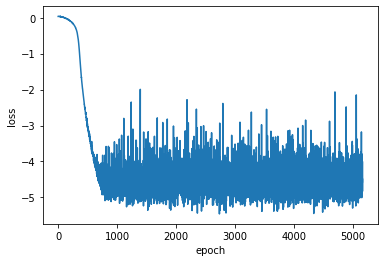

In [14]:
import matplotlib.pyplot as plt
epoch=range(len(total_loss))

#loss=np.log10(total_loss)
loss=total_loss
plt.plot(epoch,loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

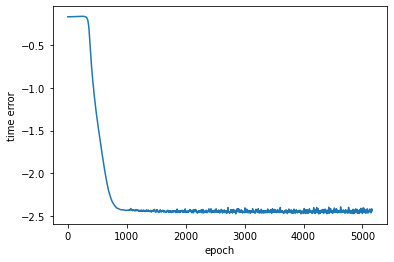

In [15]:
import matplotlib.pyplot as plt
epoch=range(len(time_error))

loss=np.log10(time_error)
#loss=time_error
plt.plot(epoch,loss)
plt.ylabel('time error')
plt.xlabel('epoch')
plt.show()

In [6]:
for i, batch in enumerate((train_loader)):
    print(batch)
    break

time0 10 [16435.73232638889, 16435.732453703702, 16435.732581018518, 16435.732754629633, 16435.732881944445, 16435.73300925926, 16435.733136574076, 16435.733252314814, 16435.73346064815, 16435.733587962965]
time 10 [0.         0.00012731 0.00012731 0.00017361 0.00012731 0.00012731
 0.00012731 0.00011574 0.00020833 0.00012731]
event 10 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
time0 10 [16416.03707175926, 16416.038275462965, 16416.0384375, 16416.039513888893, 16416.03966435185, 16416.04079861111, 16416.04092592592, 16416.042199074072, 16416.042199074072, 16416.043449074074]
time 10 [0.         0.0012037  0.00016204 0.00107639 0.00015046 0.00113426
 0.00012731 0.00127315 0.         0.00125   ]
event 10 [0, 3, 0, 3, 0, 3, 0, 3, 0, 3]
time0 10 [16405.076921296295, 16405.07721064815, 16405.077337962965, 16405.077592592592, 16405.077719907407, 16405.07789351852, 16405.078171296296, 16405.078287037042, 16405.078599537042, 16405.078715277778]
time 10 [0.         0.00028935 0.00012731 0.00025463 0.0001273

event 10 [3, 0, 3, 0, 3, 0, 3, 0, 3, 0]
time0 10 [16422.22556712963, 16422.36634259259, 16424.136226851853, 16424.136226851853, 16424.195092592592, 16455.299965277776, 16455.299965277776, 16455.30721064815, 16461.487916666665, 16461.488090277777]
time 10 [0.00000000e+00 1.40775463e-01 1.76988426e+00 0.00000000e+00
 5.88657407e-02 3.11048727e+01 0.00000000e+00 7.24537037e-03
 6.18070602e+00 1.73611112e-04]
event 10 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
time0 10 [16391.931689814814, 16391.93184027778, 16391.93304398148, 16391.93320601852, 16391.93428240741, 16391.934467592593, 16391.935671296298, 16391.935844907406, 16391.936921296296, 16391.937060185184]
time 10 [0.         0.00015046 0.0012037  0.00016204 0.00107639 0.00018519
 0.0012037  0.00017361 0.00107639 0.00013889]
event 10 [3, 0, 3, 0, 3, 0, 3, 0, 3, 0]
time0 10 [16443.918888888893, 16443.919074074074, 16443.919189814816, 16443.919317129632, 16443.919444444444, 16443.91957175926, 16443.919756944444, 16443.91988425926, 16443.9200115740

time0 10 [16421.04658564815, 16421.04681712963, 16421.04787037037, 16421.047997685186, 16421.049270833333, 16421.049386574075, 16421.050520833334, 16421.050636574073, 16421.05179398148, 16421.051921296297]
time 10 [0.         0.00023148 0.00105324 0.00012731 0.00127315 0.00011574
 0.00113426 0.00011574 0.00115741 0.00012731]
event 10 [3, 0, 3, 0, 3, 0, 3, 0, 3, 0]
time0 10 [16443.108726851853, 16443.10943287037, 16443.11695601852, 16443.11805555556, 16443.11805555556, 16443.120266203703, 16443.120289351853, 16443.132222222222, 16443.132222222222, 16443.137777777778]
time 10 [0.00000000e+00 7.06018516e-04 7.52314815e-03 1.09953704e-03
 0.00000000e+00 2.21064814e-03 2.31481499e-05 1.19328704e-02
 0.00000000e+00 5.55555556e-03]
event 10 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
time0 10 [16468.994583333333, 16468.994768518518, 16468.994791666668, 16468.994895833333, 16468.995034722222, 16468.995150462964, 16468.995289351853, 16468.995462962965, 16468.995486111107, 16468.995590277777]
time 10 [0.0000

event 10 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
time0 10 [16387.348935185186, 16387.34909722222, 16387.349525462963, 16387.349664351852, 16387.349918981483, 16387.350046296295, 16387.350347222222, 16387.350474537037, 16387.35072916667, 16387.350914351853]
time 10 [0.         0.00016204 0.00042824 0.00013889 0.00025463 0.00012731
 0.00030093 0.00012731 0.00025463 0.00018519]
event 10 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
time0 10 [16468.131030092594, 16468.131064814814, 16468.131157407406, 16468.131180555556, 16468.131296296295, 16468.131504629633, 16468.131608796295, 16468.131631944445, 16468.131747685184, 16468.131863425926]
time 10 [0.00000000e+00 3.47222194e-05 9.25925924e-05 2.31481499e-05
 1.15740739e-04 2.08333338e-04 1.04166662e-04 2.31481499e-05
 1.15740739e-04 1.15740742e-04]
event 10 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
time0 10 [16454.673703703702, 16454.674814814814, 16454.674953703703, 16454.676203703704, 16454.676203703704, 16454.677418981482, 16454.677581018517, 16454.678680555557, 16454.678

time 10 [0.00000000e+00 9.11240741e+00 1.02109954e+00 4.51388885e-04
 1.50462965e-04 0.00000000e+00 1.73611108e-04 3.18701389e+00
 1.97137731e+00 7.84329861e+00]
event 10 [4, 0, 6, 3, 3, 0, 3, 0, 0, 0]
time0 10 [16476.801273148147, 16476.801423611112, 16476.8015625, 16476.801689814816, 16476.801840277778, 16476.801979166667, 16476.802129629632, 16476.802256944444, 16476.80240740741, 16476.802546296298]
time 10 [0.         0.00015046 0.00013889 0.00012731 0.00015046 0.00013889
 0.00015046 0.00012731 0.00015046 0.00013889]
event 10 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
time0 10 [16451.42782407408, 16451.427858796298, 16451.428171296295, 16451.428194444445, 16451.428472222222, 16451.428495370372, 16451.42886574074, 16451.428888888888, 16451.428912037038, 16451.429178240738]
time 10 [0.00000000e+00 3.47222194e-05 3.12499997e-04 2.31481499e-05
 2.77777777e-04 2.31481499e-05 3.70370370e-04 2.31481463e-05
 2.31481499e-05 2.66203700e-04]
event 10 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
time0 10 [16491.0471527

 6.94444443e-04 6.94444443e-04]
event 10 [4, 3, 4, 2, 2, 2, 2, 2, 2, 2]
time0 10 [16504.444363425926, 16504.44449074074, 16504.444618055557, 16504.44481481482, 16504.44494212963, 16504.445069444446, 16504.445173611108, 16504.44528935185, 16504.44537037037, 16504.445509259258]
time 10 [0.00000000e+00 1.27314815e-04 1.27314815e-04 1.96759262e-04
 1.27314812e-04 1.27314815e-04 1.04166662e-04 1.15740742e-04
 8.10185193e-05 1.38888889e-04]
event 10 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
time0 10 [16335.088935185186, 16335.088958333336, 16335.088958333336, 16335.088993055557, 16335.089016203703, 16335.089016203703, 16335.089050925926, 16335.089097222222, 16335.089131944444, 16335.089131944444]
time 10 [0.00000000e+00 2.31481499e-05 0.00000000e+00 3.47222212e-05
 2.31481463e-05 0.00000000e+00 3.47222231e-05 4.62962962e-05
 3.47222212e-05 0.00000000e+00]
event 10 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
time0 10 [16385.282465277778, 16386.126122685186, 16386.219328703704, 16386.271979166668, 16386.29540509259, 

time0 10 [16352.170868055557, 16352.171006944443, 16352.171261574074, 16352.17138888889, 16352.1715625, 16352.171805555558, 16352.171932870371, 16352.172256944443, 16352.17238425926, 16352.172523148147]
time 10 [0.         0.00013889 0.00025463 0.00012731 0.00017361 0.00024306
 0.00012731 0.00032407 0.00012731 0.00013889]
event 10 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
time0 10 [16443.602037037042, 16443.60206018518, 16443.602175925927, 16443.602199074074, 16443.60238425926, 16443.602511574074, 16443.602638888893, 16443.602754629628, 16443.602870370367, 16443.603067129632]
time 10 [0.00000000e+00 2.31481390e-05 1.15740746e-04 2.31481463e-05
 1.85185185e-04 1.27314815e-04 1.27314819e-04 1.15740735e-04
 1.15740739e-04 1.96759265e-04]
event 10 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
time0 10 [16320.643680555557, 16320.643842592595, 16320.644097222224, 16320.644236111111, 16320.644537037037, 16320.644664351854, 16320.644768518518, 16320.645046296297, 16320.64523148148, 16320.645370370368]
time 10 [0.      

time0 10 [16366.577164351853, 16366.577430555557, 16366.577557870369, 16366.577719907407, 16366.577974537036, 16366.578125, 16366.578414351852, 16366.578541666666, 16366.57866898148, 16366.578958333335]
time 10 [0.         0.0002662  0.00012731 0.00016204 0.00025463 0.00015046
 0.00028935 0.00012731 0.00012731 0.00028935]
event 10 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
time0 10 [16436.3771875, 16436.37832175926, 16436.378425925926, 16436.379571759262, 16436.379722222224, 16436.380972222218, 16436.380972222218, 16436.382164351853, 16436.382372685184, 16436.383472222224]
time 10 [0.         0.00113426 0.00010417 0.00114583 0.00015046 0.00125
 0.         0.00119213 0.00020833 0.00109954]
event 10 [0, 3, 0, 3, 0, 3, 0, 3, 0, 3]
time0 10 [16334.478368055557, 16334.479618055557, 16334.479652777778, 16334.48082175926, 16334.481006944443, 16334.482083333334, 16334.482222222225, 16334.483344907407, 16334.483472222222, 16334.484733796296]
time 10 [0.00000000e+00 1.25000000e-03 3.47222212e-05 1.16898148e

 0.00017361 0.00012731 0.00025463 0.00013889]
event 10 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
time0 10 [16417.287662037037, 16417.287858796295, 16417.289050925927, 16417.289050925927, 16417.2903125, 16417.290439814813, 16417.29158564815, 16417.291736111107, 16417.292847222223, 16417.292974537042]
time 10 [0.         0.00019676 0.00119213 0.         0.00126157 0.00012731
 0.00114583 0.00015046 0.00111111 0.00012731]
event 10 [3, 0, 3, 0, 3, 0, 3, 0, 3, 0]
time0 10 [16490.816053240742, 16490.816365740742, 16490.81662037037, 16490.81693287037, 16490.817199074074, 16490.817453703705, 16490.817754629632, 16490.81800925926, 16490.818148148148, 16490.81844907408]
time 10 [0.         0.0003125  0.00025463 0.0003125  0.0002662  0.00025463
 0.00030093 0.00025463 0.00013889 0.00030093]
event 10 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
time0 10 [16318.124907407408, 16318.125185185183, 16318.125185185183, 16318.125451388889, 16318.125451388889, 16318.125474537037, 16318.125474537037, 16318.125729166664, 16318.125752

In [26]:
time_tensor, event_tensor = batch
time_input, time_target = model.dispatch([time_tensor[:, :-1], time_tensor[:, -1]])
event_input, event_target = model.dispatch([event_tensor[:, :-1], event_tensor[:, -1]])


In [27]:
time_tensor[0]

tensor([0.0000, 0.0003, 0.0006, 0.0007, 0.0042, 0.0000, 0.0013, 0.0001, 0.0011,
        0.0001])

In [28]:
time_input[0]

tensor([0.0000, 0.0003, 0.0006, 0.0007, 0.0042, 0.0000, 0.0013, 0.0001, 0.0011])

In [29]:
time_target[0]

tensor(0.0001)

In [8]:
time=[ 0. ,  30.05, 56.05,  0.,    0.]
np.diff(time)

array([ 30.05,  26.  , -56.05,   0.  ])

In [13]:
from scipy.ndimage.interpolation import shift
time1=shift(time,1)

In [33]:
time-time1

array([ 0.00000000e+00,  3.00500000e+01,  2.60000000e+01, -5.60500000e+01,
        1.75405325e-15])

In [34]:
time,time1

([0.0, 30.05, 56.05, 0.0, 0.0],
 array([ 0.00000000e+00,  6.91634250e-15,  3.00500000e+01,  5.60500000e+01,
        -1.75405325e-15]))

In [9]:
ind=np.max(np.nonzero(time))

In [15]:
time_new=time[:ind+1]

In [16]:
time1=shift(time_new,1)

In [17]:
time_new,time1,time_new-time1

([0.0, 30.05, 56.05],
 array([0.00000000e+00, 9.21797361e-15, 3.00500000e+01]),
 array([ 0.  , 30.05, 26.  ]))

In [18]:
time[:ind+1]=time_new-time1

In [19]:
time

[0.0, 30.04999999999999, 25.99999999999999, 0.0, 0.0]

In [14]:
import numpy as np
from scipy.integrate import quad
def quad_func(t, c,w):
            """This is the t * f(t) function calculating the mean time to next event,
            given c, w."""
            return  t * np.exp(-w  - (np.exp(-w )* (t-c)))
        

In [15]:
t_last=1
wt=0 #intensity=e^-w
args = (t_last, wt)
val, _err = quad(quad_func, t_last, np.inf, args=args)

In [16]:
val

1.9999999999999998